## Answer/Execute the following statements:

1. Load data set C_Online_Retail.xlsx as df.
2. Are there negative quantities and prices at same register? Yes, after I applied df['Quantity'].min() and df['UnitPrice'].min there were negative numbers.

3. How many registers do we have where quantity is negative and prices is 0 or vice-versa. 1336 rows where quantity is negative
4. What is common in the invoices with negative quantity? Starts with C
5. How many registers do we have where UnitPrice is negative? And what are their CustomerIDs? 2, no customerID
6. Drop all the NaN in the CustomerID column.
7. How many sales records do we have with Customer ID and zero in Unit Price?
8. Look at the description and uniqueness of StockCode and Description by running this:

In [126]:
#1 #load retail excel
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

df = pd.read_excel(r'C:\Users\knocom\Eskwelabs Jupyter Notebooks\C\C_Online_Retail.xlsx')

In [127]:
#2a
df['Quantity'].min()

-80995

In [128]:
#2b
df['UnitPrice'].min()

-11062.06

In [129]:
#3a
df[(df['Quantity']<0) & (df['UnitPrice']==0)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [130]:
#3b
df[(df['Quantity']==0) & (df['UnitPrice']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [131]:
#4
df[(df['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [132]:
#5
df[(df['UnitPrice']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [60]:
#6
df = df.dropna(subset= ['CustomerID'])
#np.sum(df['CustomerID'].isnull()) verify how many customerIDs were null

In [133]:
df = df[(drop_df['Quantity']>=0)&(df['UnitPrice']>=0)]

In [134]:
df.shape

(397924, 8)

In [135]:
#7
df[(df['UnitPrice']==0)]
df[(df['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
#8

In [136]:
cat_des_df = df.groupby(["StockCode","Description"]).count().reset_index()
df[df['StockCode'] == cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1]
      .reset_index()['index'][4]]['Description'].unique()

array(['WRAP DOILEY DESIGN', 'WRAP  VINTAGE DOILEY ',
       'WRAP  VINTAGE DOILY '], dtype=object)

9. What can you say about the uniqueness of the Description per StockCode? There are 2 Vintage Doileys
10. Run this code to make a table of unique Description per StockCode:

In [ ]:
#9  There are 2 Vintage Doileys

In [137]:
#10
unique_desc = df[["StockCode", "Description"]].groupby(by=["StockCode"]).\
                apply(pd.DataFrame.mode).reset_index(drop=True)

11. We will merge `unique_desc` with `df` to get the value of other columns using an SQL wrapper `pandassql`. To install, run:

In [138]:
#11
!pip install pandasql

12. Import the associated libraries and run the query:

In [139]:
#12
from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())
new_df = pd.DataFrame(pysqldf(
    """select df.InvoiceNo, 
        df.StockCode, 
        un.Description, 
        df.Quantity, 
        df.InvoiceDate,
        df.UnitPrice, 
        df.CustomerID, 
        df.Country 
    from df as df 
        INNER JOIN unique_desc as un on df.StockCode = un.StockCode
        """))

13. What is the dimensions of the `new_df`? 397884 rows , 8 col
14. Convert `InvoiceDate` column to datetime.
15. Make a new column `Amount` by multiplying Quantity and UnitPrice.
16. Convert `CustomerID` to integer.
17. Make a barplot of the Amount of Sales per Country (don't forget the titles and labels).
18. How many percent is from UK and oustide of UK.
19. Who are the top 10 customers and what is their contribution (%) in sales and in quantity?
17.26% of Sales are from the Top 10 Customers
CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
12415    124914.53
14156    117379.63
17511     91062.38
16029     81024.84
12346     77183.60
20. What are the top 10 products and what is their contribution (%) in sales and in quantity? 
9.95% of Sales are from the Top 10 Products
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100603.50
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20

In [140]:
#13 
new_df.shape

(397924, 8)

In [141]:
#14
new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'])

In [142]:
new_df.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [143]:
#15 
new_df['Amount'] = new_df['Quantity'] * new_df['UnitPrice']
new_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [144]:
#16
new_df['CustomerID'] = new_df['CustomerID'].astype('int64', copy=False)
new_df.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
Amount                float64
dtype: object

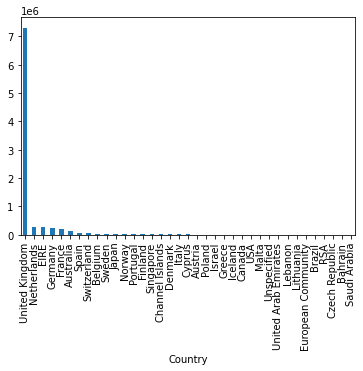

In [145]:
#17
new_df.groupby('Country')['Amount'].sum().sort_values(ascending = False).plot(kind='bar')

In [146]:
new_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [147]:
#18
new_df.loc[new_df['Country'] == 'United Kingdom']



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397904,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,23.40
397905,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60
397906,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,30.00
397907,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,214.80


In [148]:
total_sales = np.sum(new_df['Amount'])
print(total_sales)

8911407.904


In [149]:
uk_sales = new_df.groupby('Country')['Amount'].sum().loc['United Kingdom']
print(uk_sales)

7308391.5540030645


In [150]:
uk_sales / total_sales #82.01% are from UK, 17.99% from outside UK

0.820116375856008

In [151]:
#19 
new_df.groupby('CustomerID')['Amount'].sum().sort_values(ascending = False).head(10)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
12415    124914.53
14156    117379.63
17511     91062.38
16029     81024.84
12346     77183.60
Name: Amount, dtype: float64

In [152]:
topten_sales = np.sum(new_df.groupby('CustomerID')['Amount'].sum().sort_values(ascending = False).head(10))

In [153]:
topten_sales / total_sales #17.26% of Sales are from the Top 10 Customers

0.1726188124897216

In [154]:
#20
new_df.groupby('Description')['Amount'].sum().sort_values(ascending = False).head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100603.50
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: Amount, dtype: float64

In [155]:
topten_products = np.sum(new_df.groupby('Description')['Amount'].sum().sort_values(ascending = False).head(10))

In [156]:
topten_products / total_sales 

0.09949699638392855

In [123]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  int64         
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
 8   Amount       397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 27.3+ MB


In [125]:
new_df.shape

(397884, 9)

In [157]:
new_df.to_csv('new_df.csv')